Path to dataset files: C:\Users\anura\.cache\kagglehub\datasets\huyngohoang\housingcsv\versions\1
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Ap

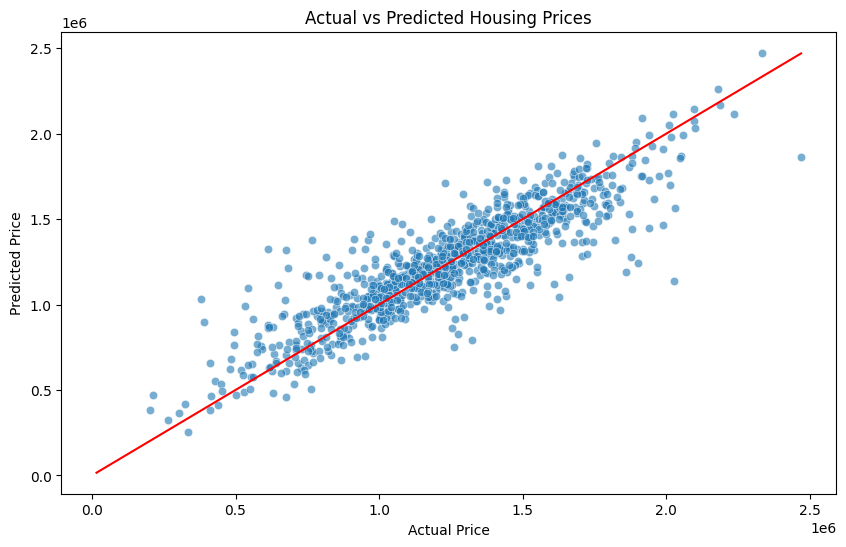

In [5]:
import kagglehub

path = kagglehub.dataset_download("huyngohoang/housingcsv")

print("Path to dataset files:", path)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

file_path = os.path.join(path, "housing.csv")
df = pd.read_csv(file_path)

print(df.head())

print(df.columns)

df = df.drop(columns=['Address'])


np.random.seed(42)
for col in ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms']:
    missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing_indices, col] = np.nan

print("Missing values after injection:\n", df.isnull().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()
